In [129]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

In [131]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

data.head()

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


# PCA application on dataframe

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(scaled_data)

# Kmeans Clustering

In [237]:
#fonction de visualisation
def vizClusters(clustering, method):
    # Définir les couleurs pour les clusters
    colors = ['red', 'yellow', 'blue', 'green']
    
    plt.figure(figsize=(9, 6))
    # Afficher les résultats
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering.labels_, cmap=matplotlib.colors.ListedColormap(colors))
    
    # Annotation des points
    for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points', fontsize=8, color='black')
    
    plt.xlabel('Composante principale 1')
    plt.ylabel('Composante principale 2')
    titre = "Projection des villes dans le plan principal avec " + method
    plt.title(titre)
    plt.show()

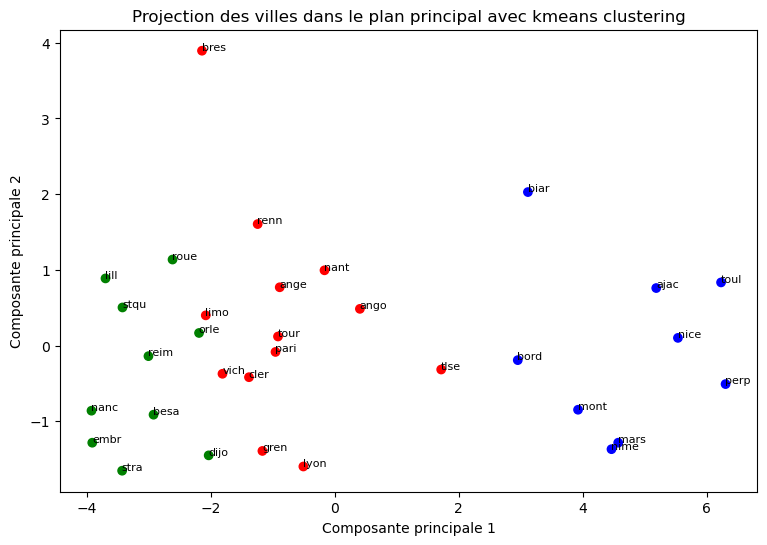

In [239]:
# Appliquer KMeans avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clustering = kmeans.fit(X_pca)

vizClusters(clustering, "kmeans clustering")

## Remarques sur le résultat obtenu :
- on a fait un partitionnement en 3 groupes, on les voit bien sur le graphique
  - le cluster jaune dans l'intervalle [1,7]
  - le cluster rouge dans l'intervalle [-2,2]
  - le cluster bleu dans l'intervalle [-4,-2]

# Agglomerative Clustering

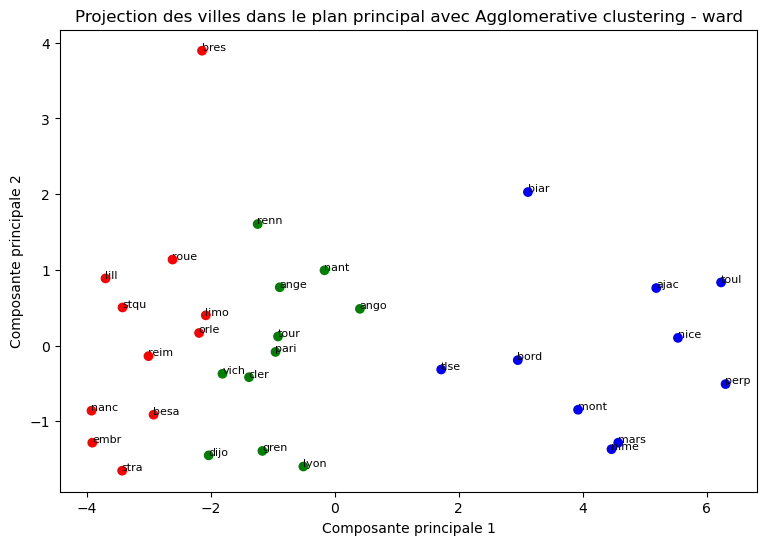

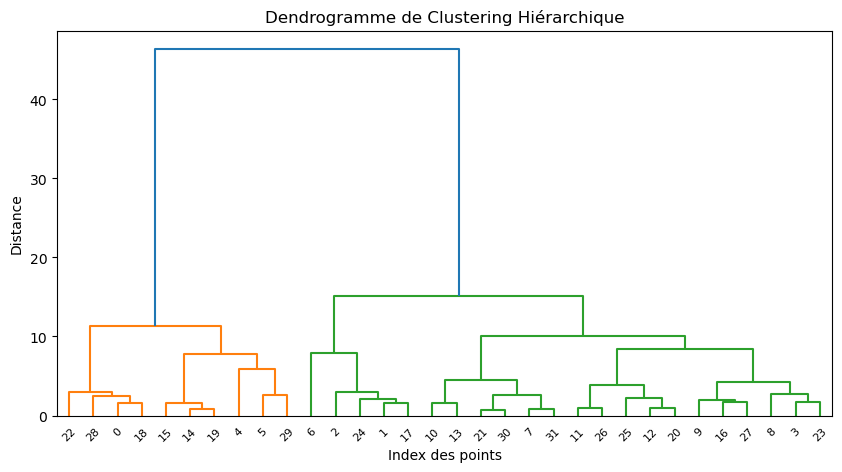

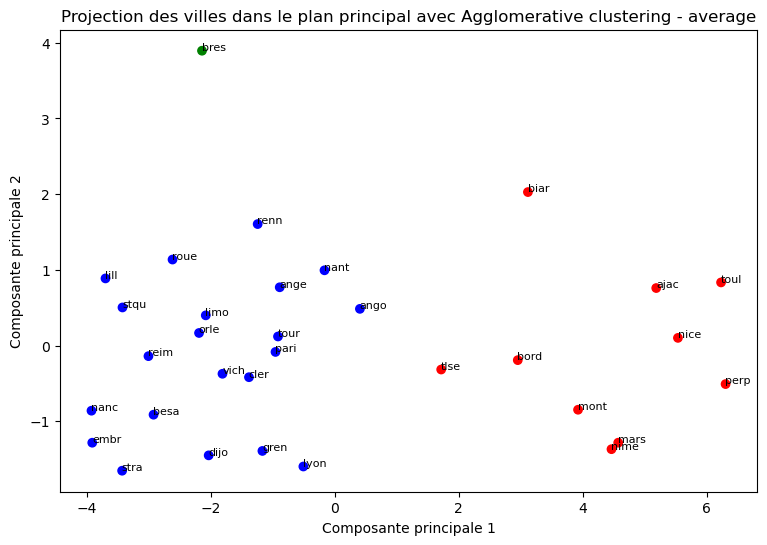

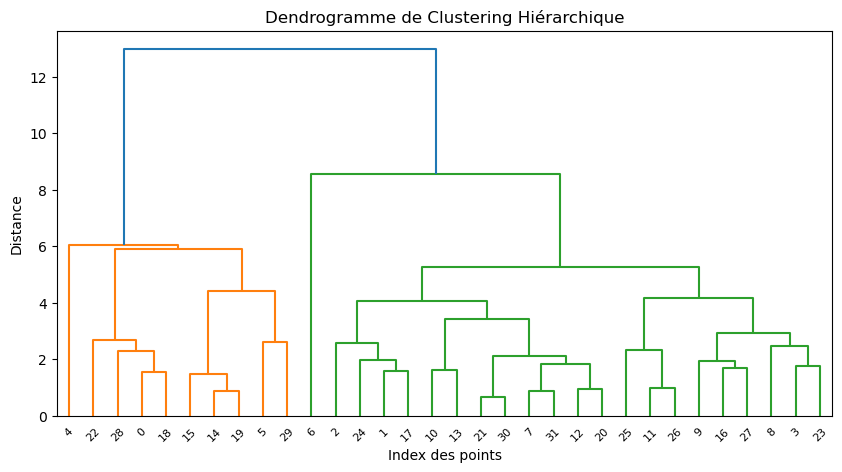

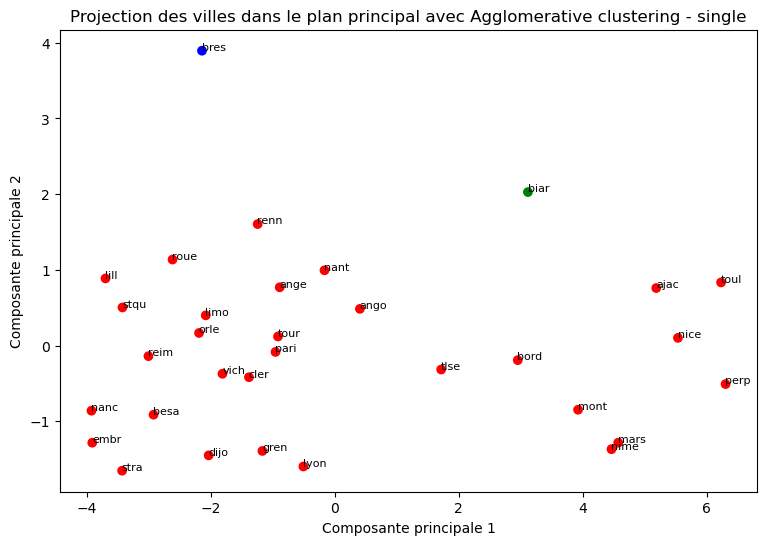

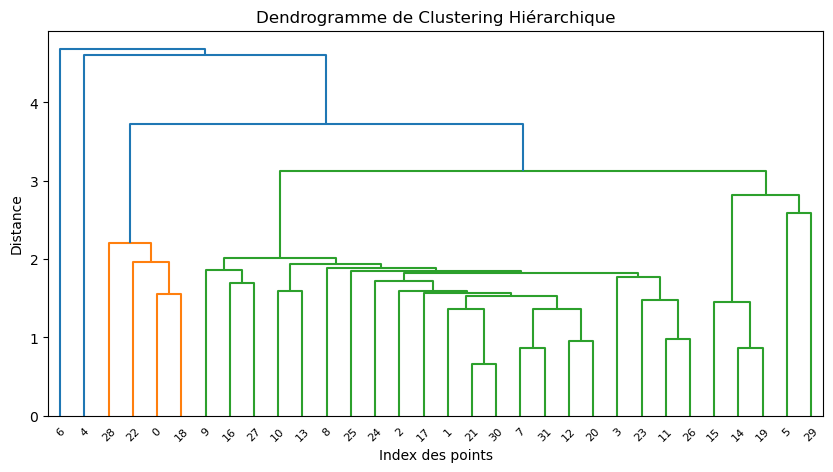

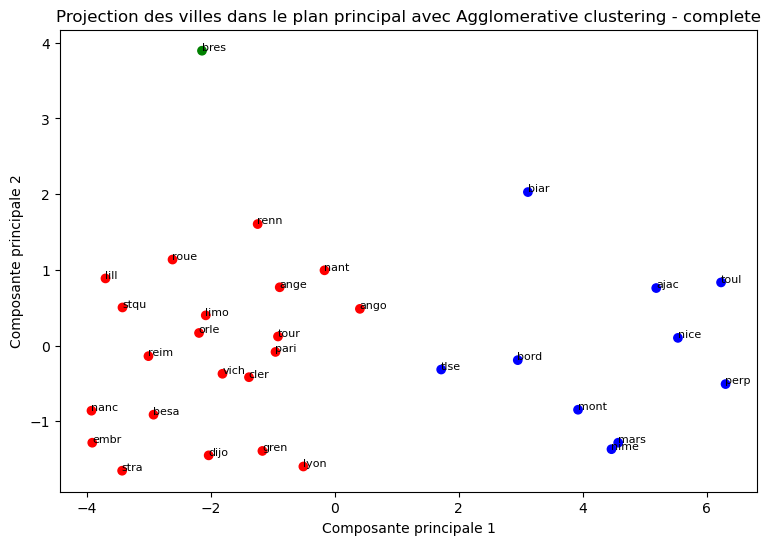

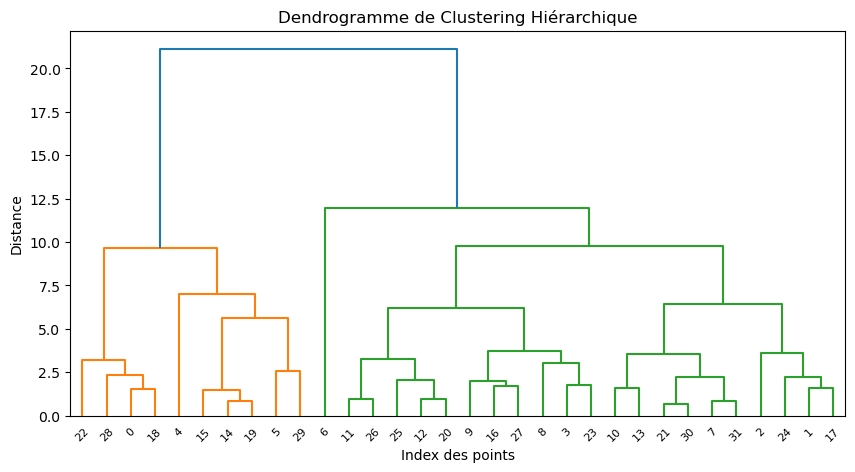

In [252]:
from sklearn.cluster import AgglomerativeClustering
# Définir les méthodes d'agrégation
methods = ['ward', 'average', 'single', 'complete']

# Pour chaque méthode, appliquer AgglomerativeClustering avec 3 clusters
for method in methods:
    clustering = AgglomerativeClustering(n_clusters = 3, linkage = method)
    clustering.fit(X_pca)
    title = "Agglomerative clustering - "+method
    vizClusters(clustering, title)

    # Calcul de la matrice de distance et du dendrogramme
    plt.figure(figsize=(10, 5))
    sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogramme de Clustering Hiérarchique")
    plt.xlabel("Index des points")
    plt.ylabel("Distance")
    plt.show()

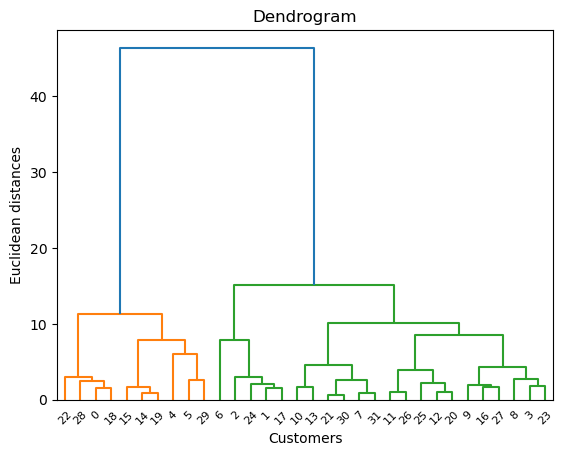

In [247]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()